In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pathlib

dir = pathlib.Path(os.getcwd()).absolute().parent.parent
dir

WindowsPath('C:/Users/Abhijeet/Documents/GitHub/dsba4152')

In [3]:
os.chdir(dir)

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
from dsba4152.utils.get_test_train import GetTestTrain

In [6]:
root_path = "F:/Data/satimages/v4composite/untar/untar/countries/dataset/"
csv_path = "./data_c/gdp_melted.csv"
X , y , years = GetTestTrain(root_path , csv_path,"IND").get_all_data()

In [64]:
ss = StandardScaler()
y = ss.fit_transform(y.reshape(-1,1))

In [7]:
X.shape

(357, 3693, 3797)

In [8]:
imgdf = pd.DataFrame({ "gdp" : y , "year" : years}).reset_index()

In [9]:
imgdf["year"].unique()

array([1993, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011])

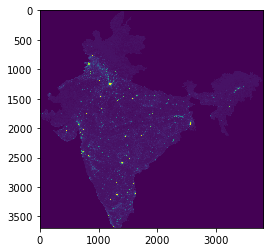

In [11]:
plt.imshow(X[imgdf[imgdf["year"] == 1993].loc[0, "index"]])

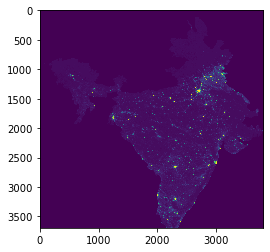

In [12]:
plt.imshow(X[imgdf[imgdf["year"] == 2006].head(1)["index"].values[0]])

In [13]:
im1993 = X[imgdf[imgdf["year"] == 1993].head(1)["index"].values[0]]
im2003 = X[imgdf[imgdf["year"] == 2003].head(1)["index"].values[0]]
im2011 = X[imgdf[imgdf["year"] == 2011].head(1)["index"].values[0]]

In [14]:
refyear = imgdf["year"].unique()[0]
refimg = X[imgdf[imgdf["year"] == refyear].head(1)["index"].values[0]]
space =  np.geomspace(0.5,1,1000)
bins = np.quantile(refimg ,space)

In [15]:
def thresh(im , t=970):
    g = np.digitize(im , bins)
    return (g > t)

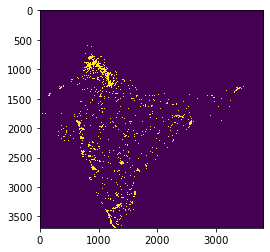

In [16]:
plt.imshow(thresh(im1993))

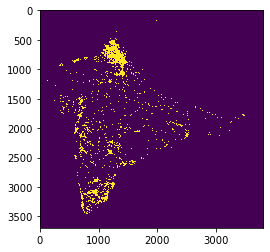

In [17]:
plt.imshow(thresh(im2003))

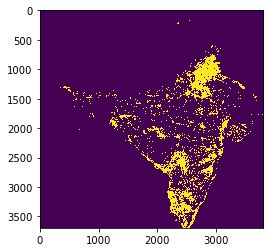

In [18]:
plt.imshow(thresh(im2011))

In [19]:
X[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [25]:
import cv2

In [28]:
X[:50].shape

(50, 3693, 3797)

In [53]:
X50 = np.array([cv2.resize(im ,(128,128) ,cv2.INTER_CUBIC) for im in X])
X50 = X50[..., np.newaxis]

In [54]:
input_shape = X50.shape
input_shape

(357, 128, 128, 1)

In [46]:
from keras.models import Sequential
from keras.layers import Dense , MaxPooling2D, Flatten
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Conv2D
import keras.backend as K
from keras.metrics import RootMeanSquaredError

In [65]:
def build_model(input_shape):
    def model():
        model = Sequential()
        model.add(Conv2D(2, 3, activation='relu', input_shape=input_shape[1:]))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(Flatten())
        model.add(Dense(13, kernel_initializer='normal', activation='relu'))
        model.add(Dense(1, kernel_initializer='normal'))

        model.compile(loss="mean_squared_error",metrics=[RootMeanSquaredError(name='rmse')], optimizer='adam')
        return model
    return model
    

In [70]:
estimator = KerasRegressor(build_fn=build_model(input_shape), epochs=500, verbose=1)

In [71]:
from sklearn.model_selection import cross_validate

In [72]:
cross_validate(estimator, X50 , y)

Epoch 1/500
285/285 [==============================] - 1s 3ms/step - loss: 9.9042 - rmse: 3.1471
Epoch 2/500
285/285 [==============================] - 1s 3ms/step - loss: 1.3400 - rmse: 1.1576
Epoch 3/500
285/285 [==============================] - 1s 3ms/step - loss: 0.8446 - rmse: 0.9190
Epoch 4/500
285/285 [==============================] - 1s 3ms/step - loss: 0.7268 - rmse: 0.8525
Epoch 5/500
285/285 [==============================] - 1s 3ms/step - loss: 0.6321 - rmse: 0.7951
Epoch 6/500
285/285 [==============================] - 1s 3ms/step - loss: 0.5801 - rmse: 0.7617
Epoch 7/500
285/285 [==============================] - 1s 3ms/step - loss: 0.5438 - rmse: 0.7374
Epoch 8/500
160/285 [===============>..............] - ETA: 0s - loss: 0.4797 - rmse: 0.6926

KeyboardInterrupt: 